In [8]:
cd '/mmfs1/data/aglinska/BC-MRI-AE/'

/mmfs1/data/aglinska/BC-MRI-AE


In [9]:
import pickle 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind as ttest

In [10]:
rsa = pickle.load(open('all_rsa_rsa_results.pickle','rb'))

In [11]:
keys = list(rsa.keys())

In [12]:
pallete = sns.color_palette()
pallete_new = sns.color_palette()

In [13]:
def plot_nice_bar(key,rsa,ax=None,figsize=None,dpi=None,fontsize=None,fontsize_star=None,fontweight=None,line_width=None,marker_size=None,title=None):
    #key = 'ADOS_gotham_PC1'

    if not figsize:
        figsize = (5,2)
    if not dpi:
        dpi = 300
        
    if not ax:
        fig, ax = plt.subplots(1,1,figsize=figsize,dpi=dpi)

    pallete_new[1]=pallete[0]
    pallete_new[0]=pallete[1]
    pallete_new[0] = tuple(np.array((.5,.5,.5)))

    data=rsa[key]
    n = data.shape[0]
    c = data.shape[1]
    x = np.arange(c)
    
    if not fontsize:
        fontsize = 16
        
    if not fontsize_star:
        fontsize_star = 25
    if not fontweight:        
        fontweight = 'bold'
    if not line_width:    
        line_width = 2.5
    if not marker_size:            
        marker_size = .1
    


    for i in range(c):
        plot_data = np.zeros(data.shape)
        plot_data[:,i] = data[:,i]

        xs = np.repeat(i,n)+(np.random.rand(n)-.5)*.25
        sc = plt.scatter(xs,data[:,i],c='k',s = marker_size)
        b = sns.barplot(data=plot_data,errcolor='r',linewidth=line_width,errwidth=line_width,facecolor=np.hstack((np.array(pallete_new[i]),.3)),edgecolor=np.hstack((np.array(pallete_new[i]),1)))
        #sns.barplot(x=i,y=data.mean(axis=0)[i],errcolor='r',linewidth=2.5,facecolor=np.hstack((np.array(pallete_new[i]),.7)),edgecolor=np.hstack((np.array(pallete_new[i]),.7)))

    #xlbls = ['VAE','BG','SL']
    locs, labels = plt.yticks()  
    new_y = locs
    new_y = np.linspace(locs[0],locs[-1],6)
    plt.yticks(new_y,labels=[f'{yy:.2f}' for yy in new_y],fontsize=fontsize,fontweight=fontweight)
    plt.ylabel('model fit (r)',fontsize=fontsize,fontweight=fontweight)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(line_width)

    xlbls = ['VAE','BG','SL']
    plt.xticks(np.arange(3),labels=xlbls,fontsize=fontsize,fontweight=fontweight)


    do_one_sample_stars = True
    if do_one_sample_stars:
        one_sample = np.array([ttest_1samp(data[:,i],0) for i in range(3)])
        one_sample_thresh = np.array((1,.05,.001,.0001))
        one_sample_stars = np.array(('n.s.','*','**','***'))
        xlbls = ['VAE','BG','SL']
        for i in range(c):
            these_stars = one_sample_stars[max(np.nonzero(one_sample[i,1]<one_sample_thresh)[0])]
            xlbls[i] = f'{xlbls[i]}\n({these_stars})'
        plt.xticks(np.arange(3),labels=xlbls,fontsize=fontsize,fontweight=fontweight,horizontalalignment='center',multialignment='center')

    pairwise_t = np.zeros((3,3))
    pairwise_p = np.zeros((3,3))

    pairwise_sample_thresh = np.array((1,.05,.001,.0001))
    pairwise_sample_stars = np.array(('n.s.','*','**','***'))

    for i in range(c):
        for j in range(c):
            t,p = ttest(data[:,i],data[:,j])
            pairwise_t[i,j] = t
            pairwise_p[i,j] = p

    comps = [[1,2]]
    for comp_idx in range(len(comps)):
        this_comp = comps[comp_idx]
        sig_idx = max(np.nonzero(pairwise_p[this_comp[0],this_comp[1]]<pairwise_sample_thresh)[0])
        max_y = new_y[-1] + comp_idx*.05
        xs = np.array(this_comp)
        stars = pairwise_sample_stars[sig_idx]
        plt.plot(xs,[max_y,max_y],'k',linewidth=line_width)
        plt.text(xs.mean(),max_y,stars,fontsize=fontsize_star,horizontalalignment='center',fontweight=fontweight)
        
    #plt.plot(plt.xlim(),[0,0],'k',linewidth=line_width)
    ylim = plt.ylim()
    plt.ylim(np.array(ylim)*(1,1.1))
        
    #plt.xlabel(key,fontsize=fontsize,labelpad=25.1,fontweight=fontweight)    
    
    if not title:
        plt.title(key,fontsize=fontsize*1.5,pad=10,fontweight=fontweight)    
    else:
        plt.title(title,fontsize=fontsize*1.5,pad=10,fontweight=fontweight)    
    
        

<ipython-input-13-281ab6490b27>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize=figsize,dpi=dpi)


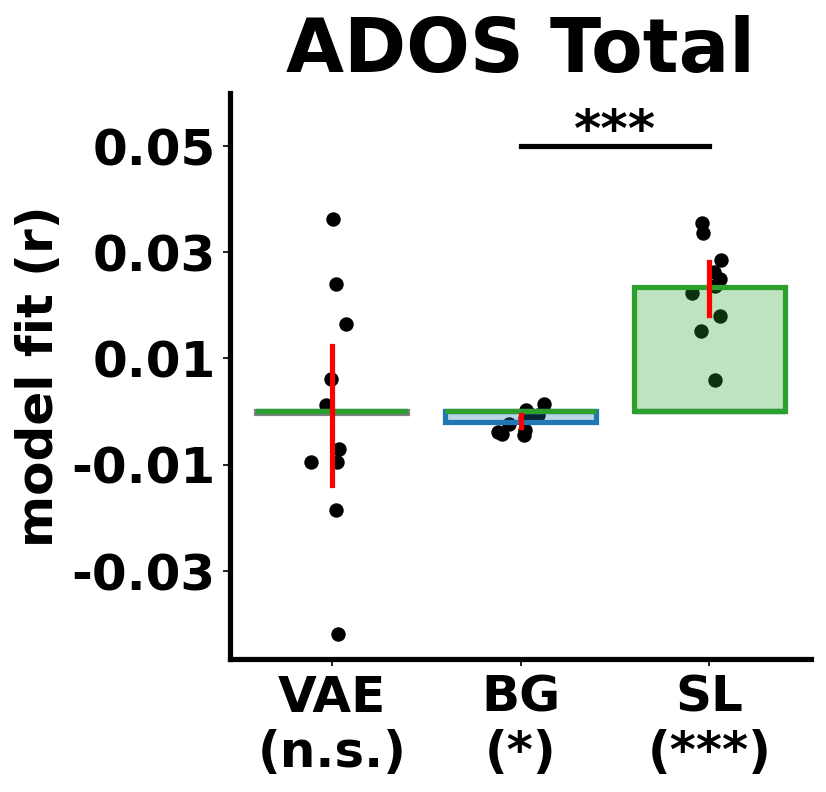

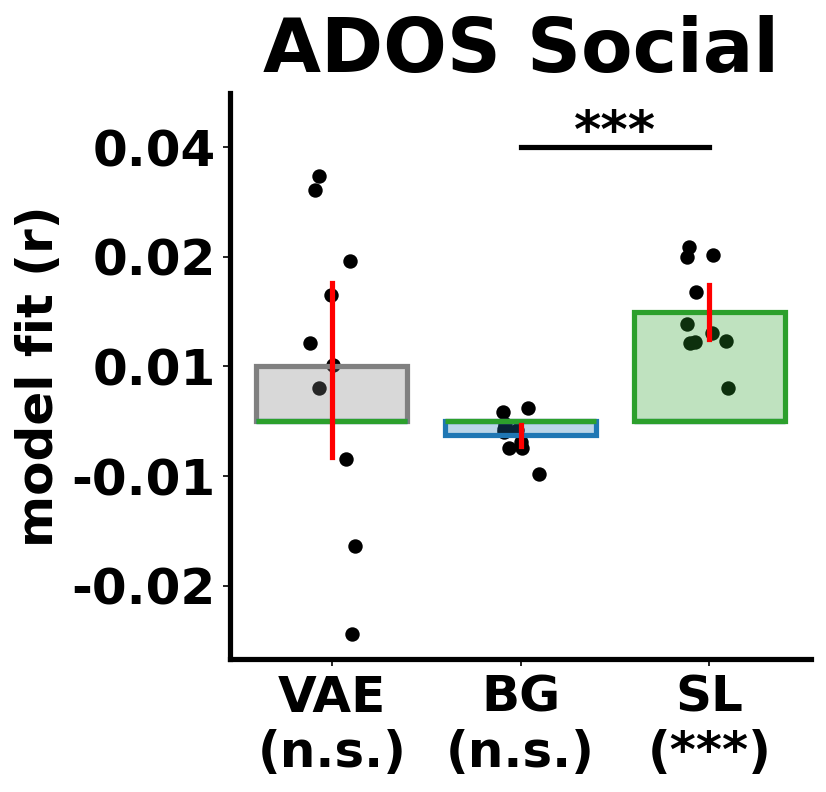

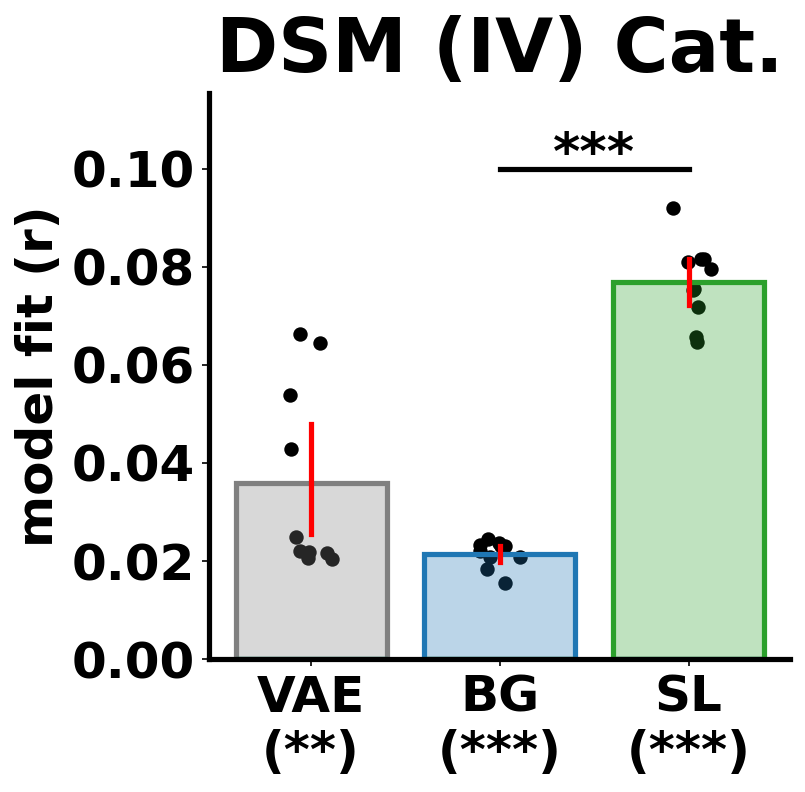

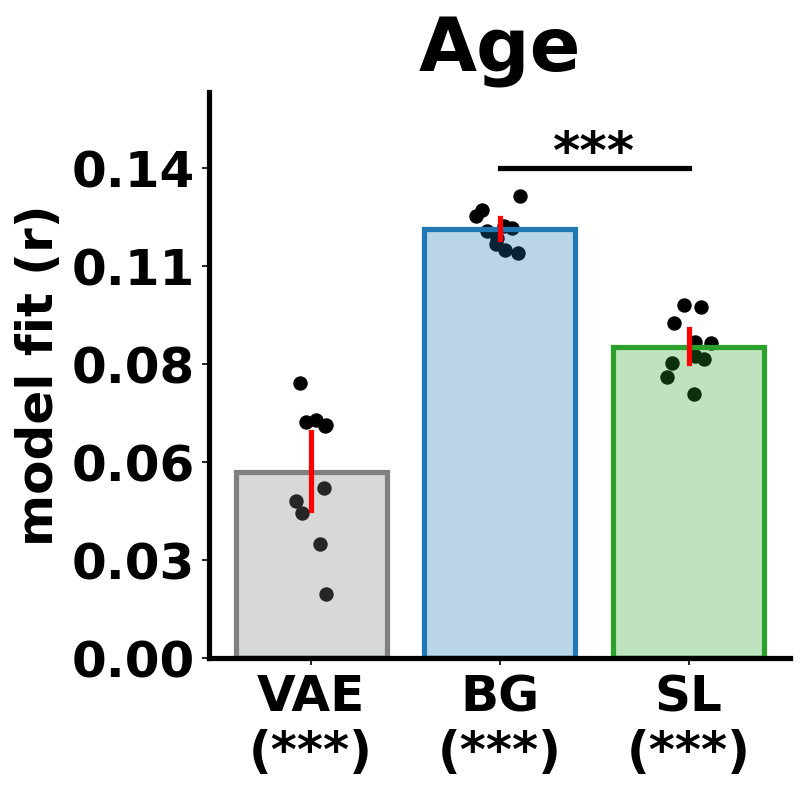

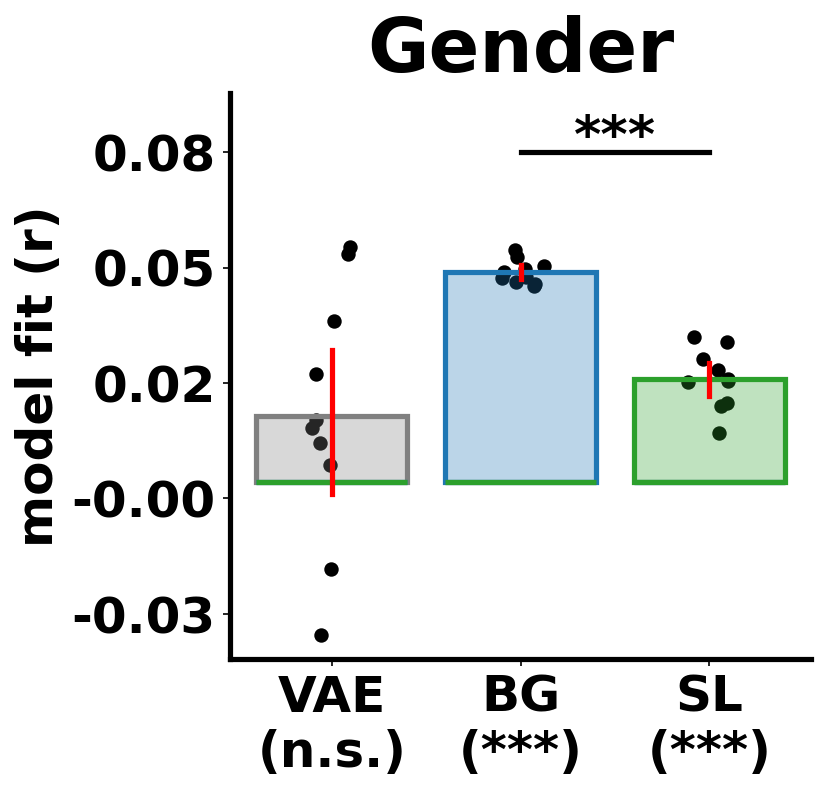

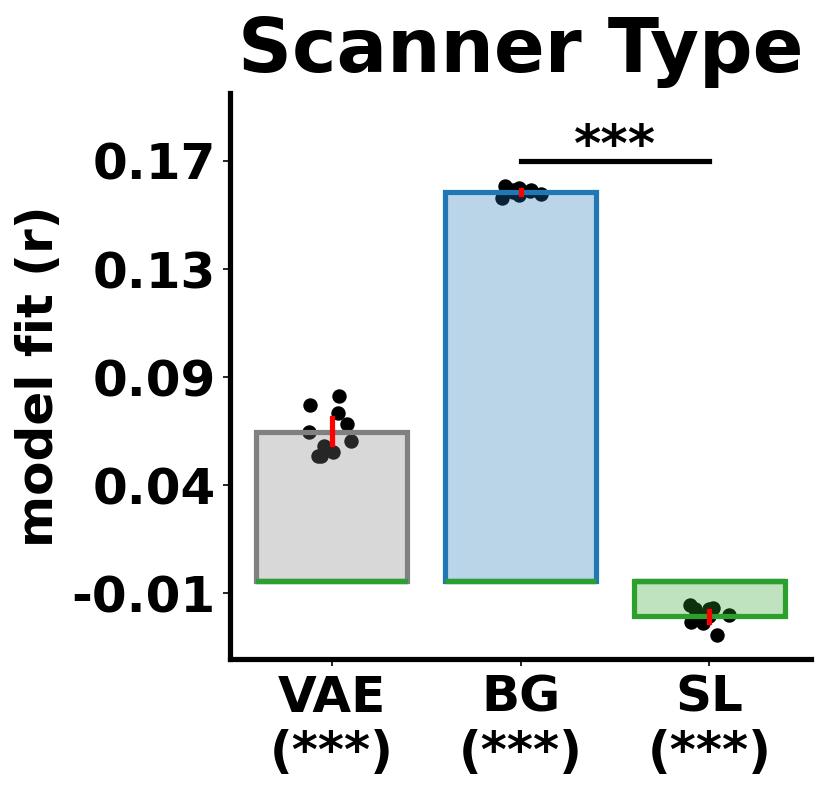

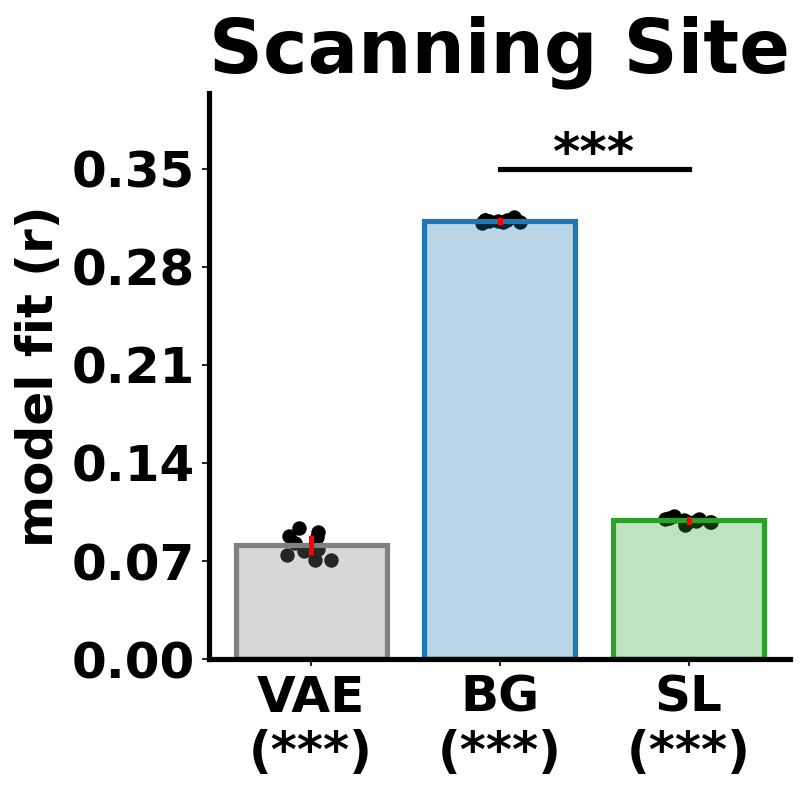

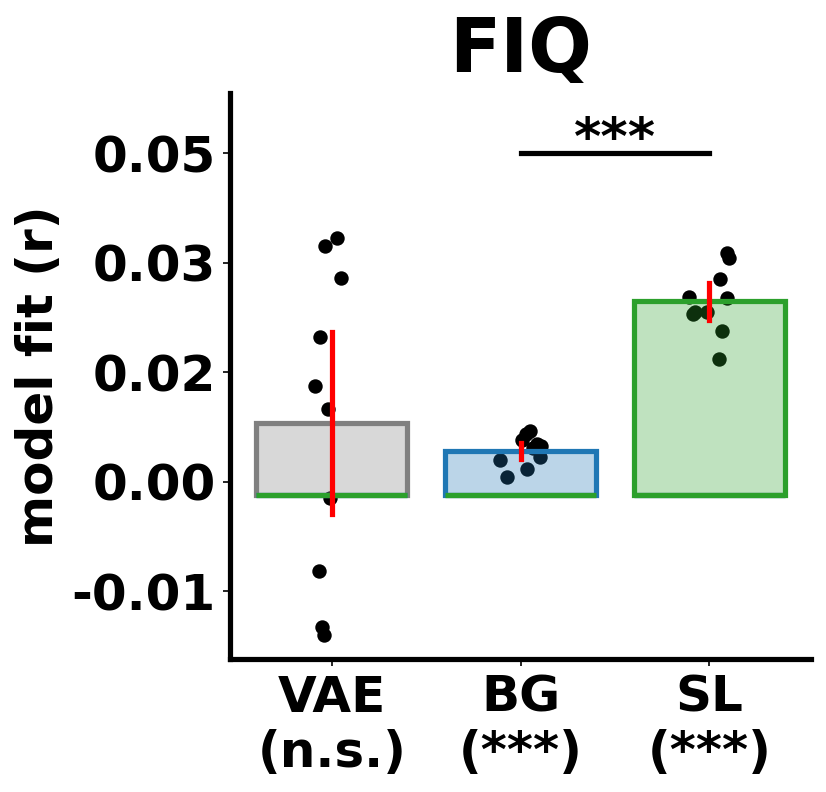

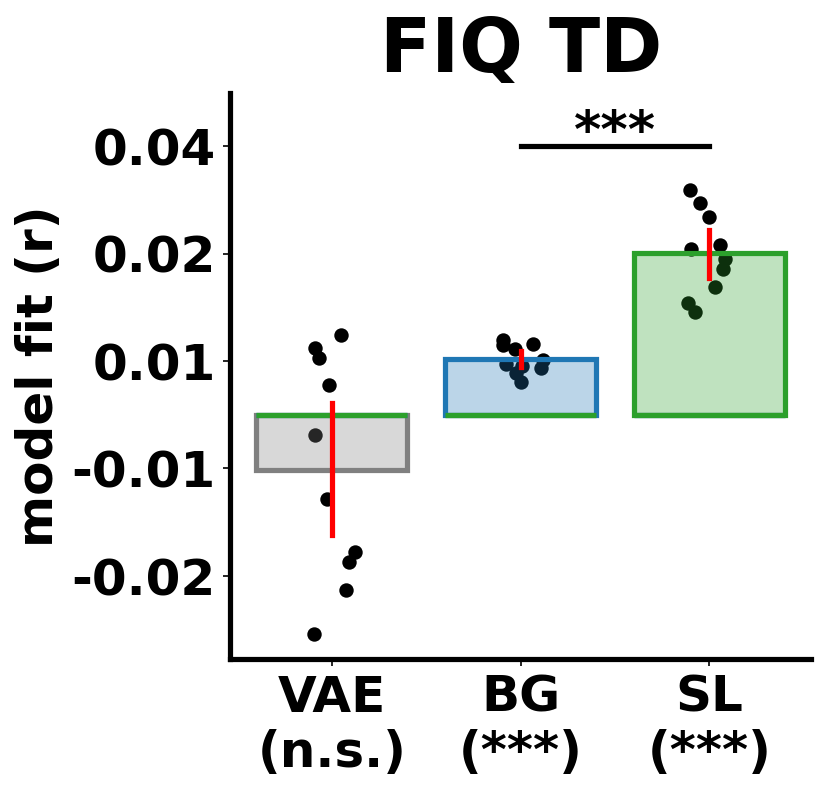

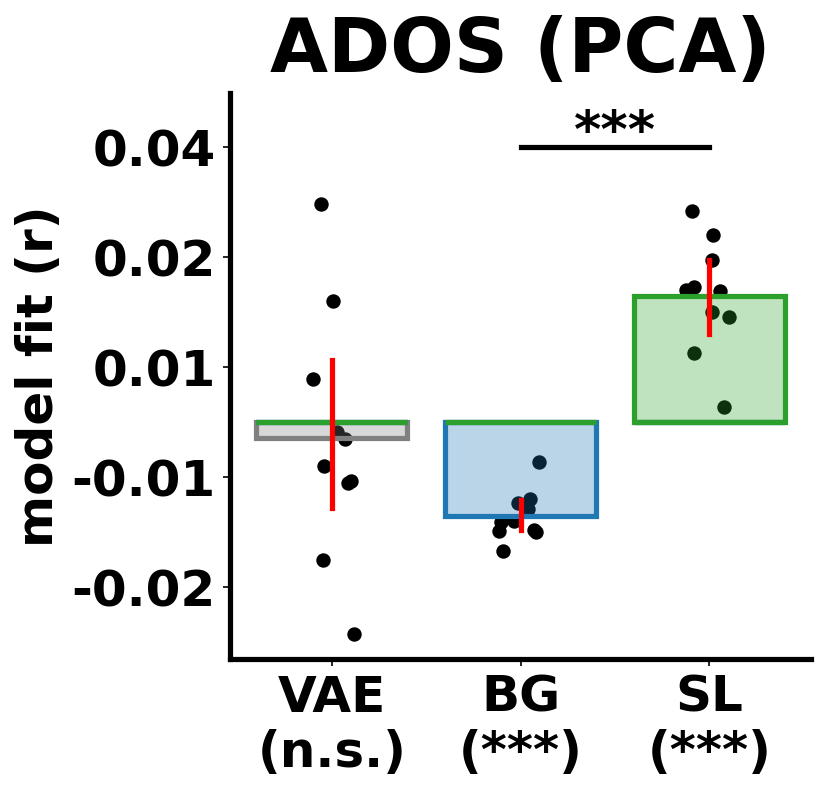

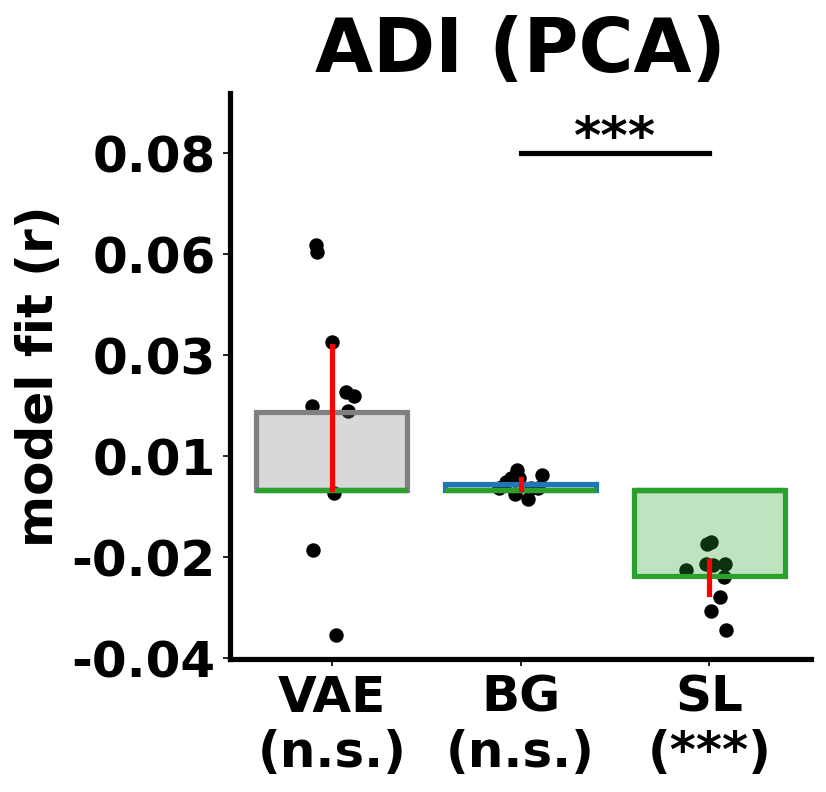

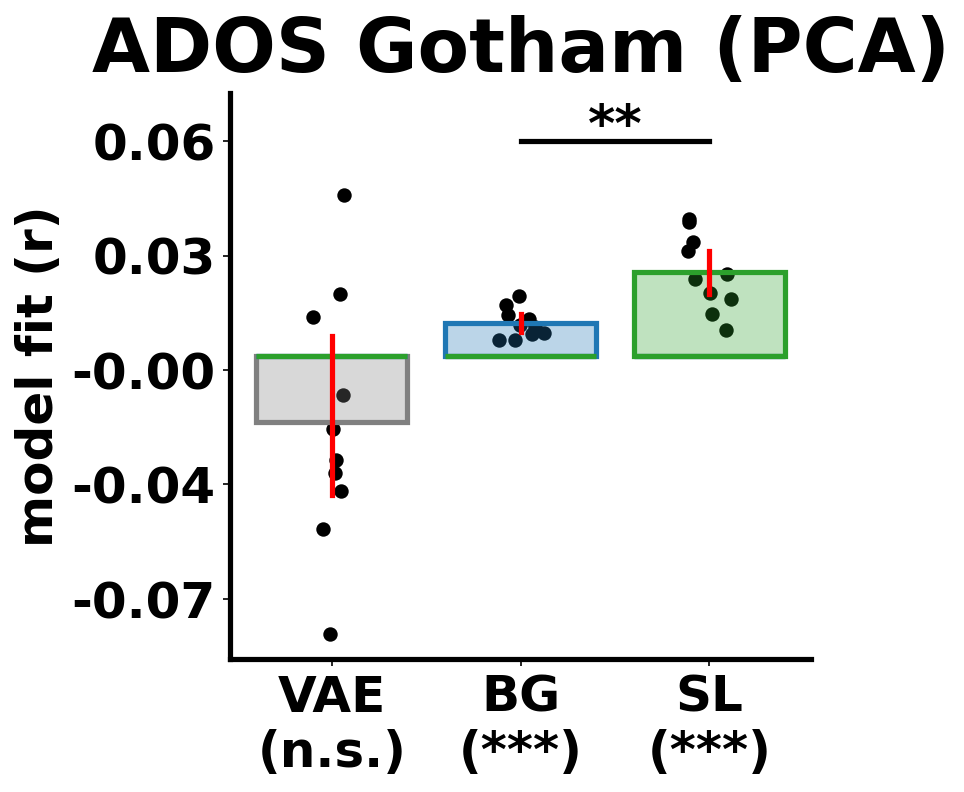

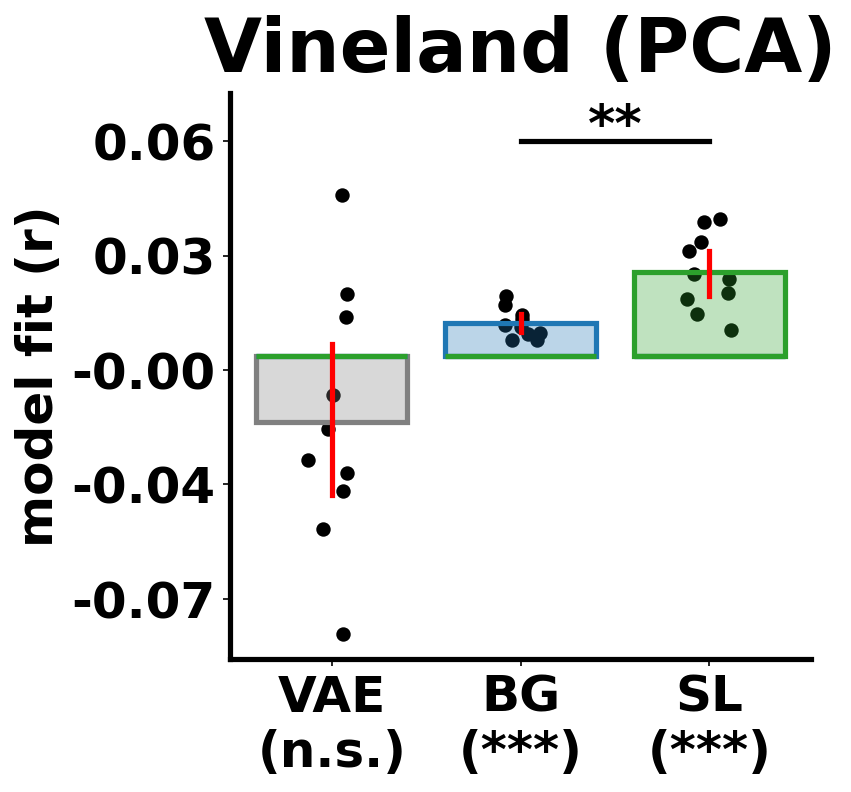

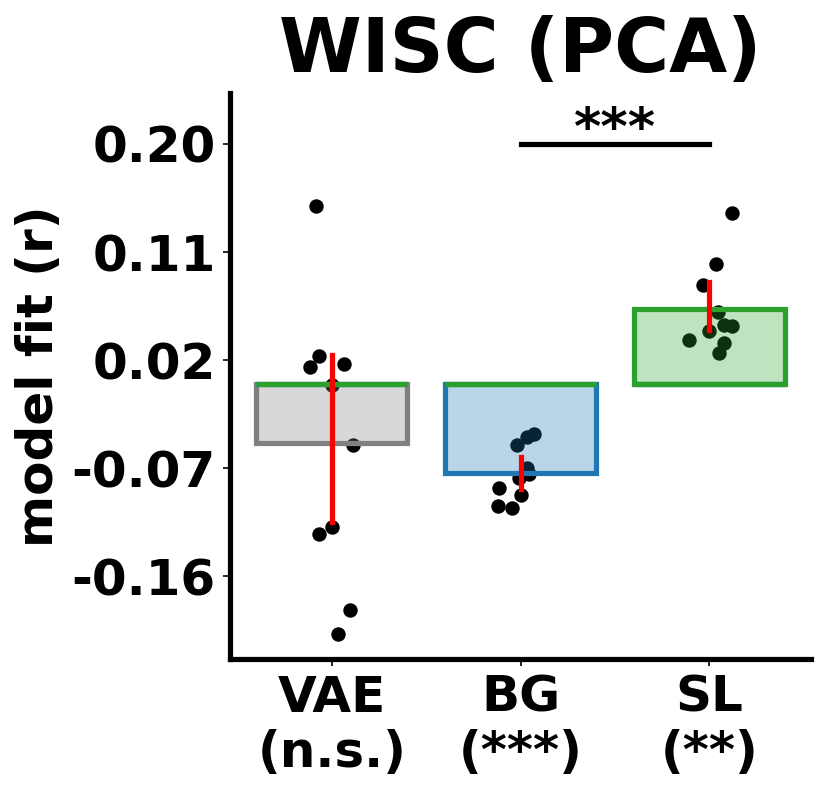

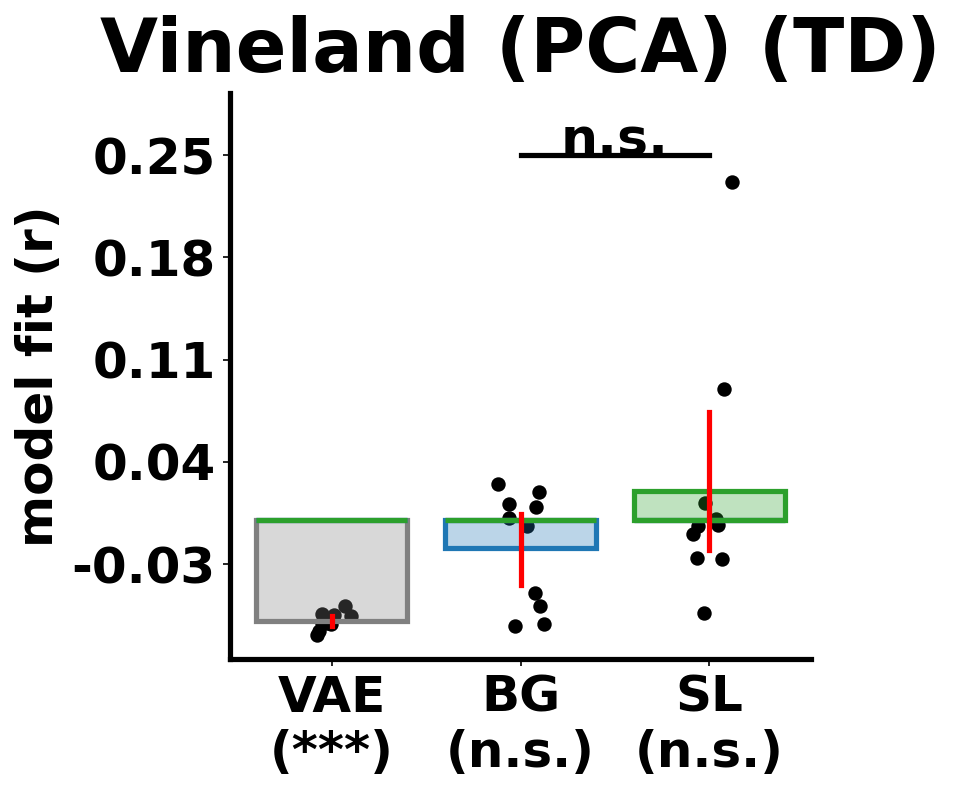

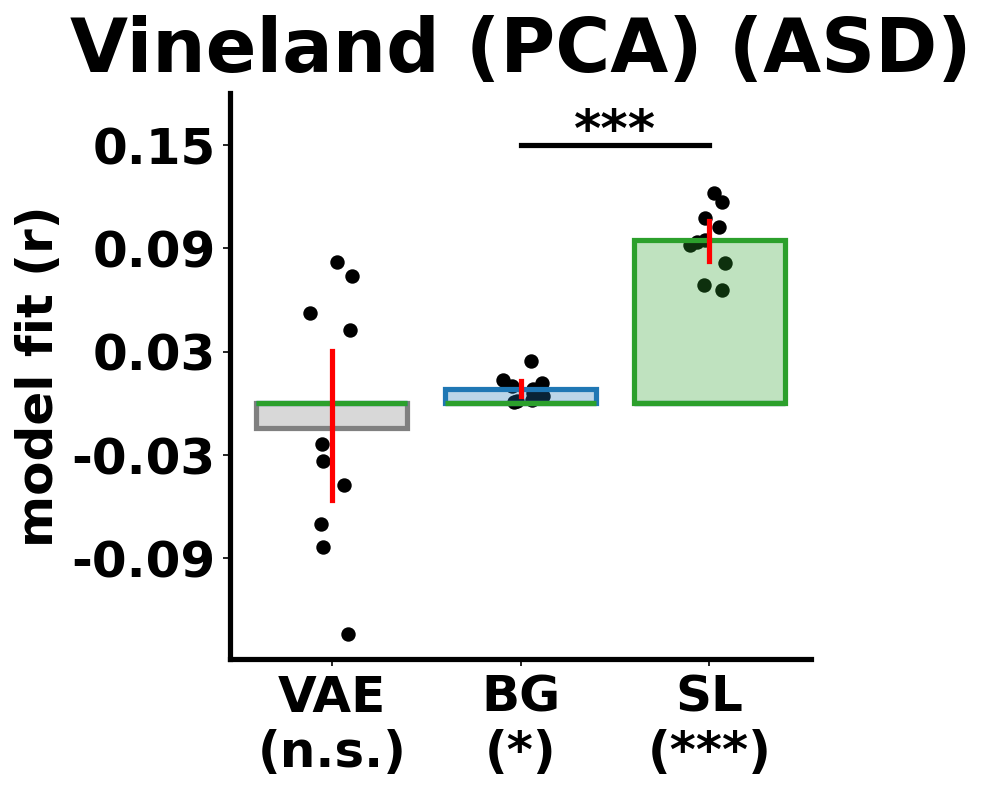

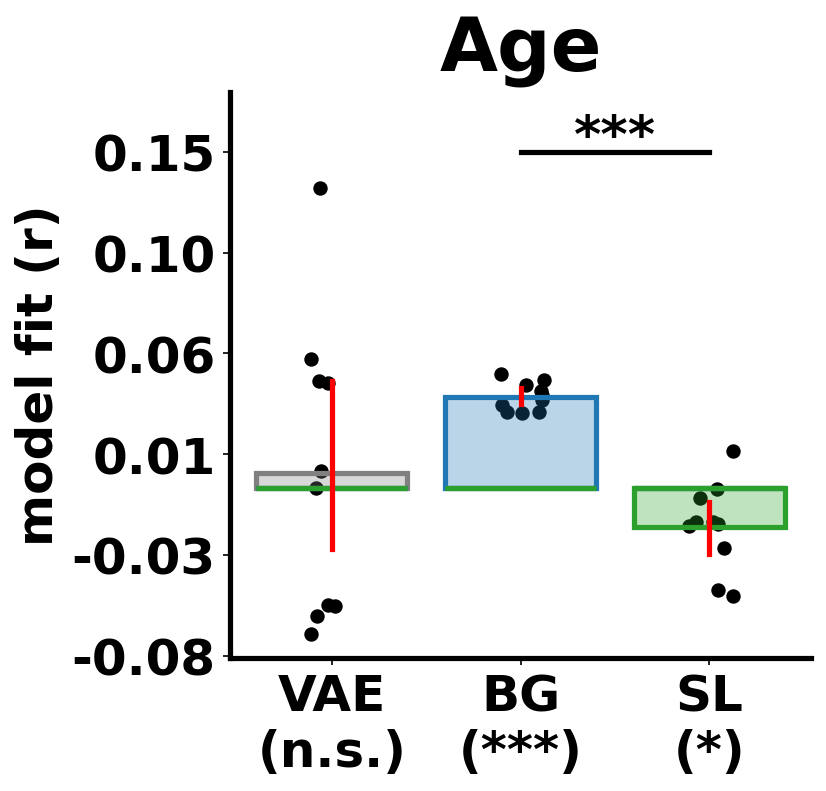

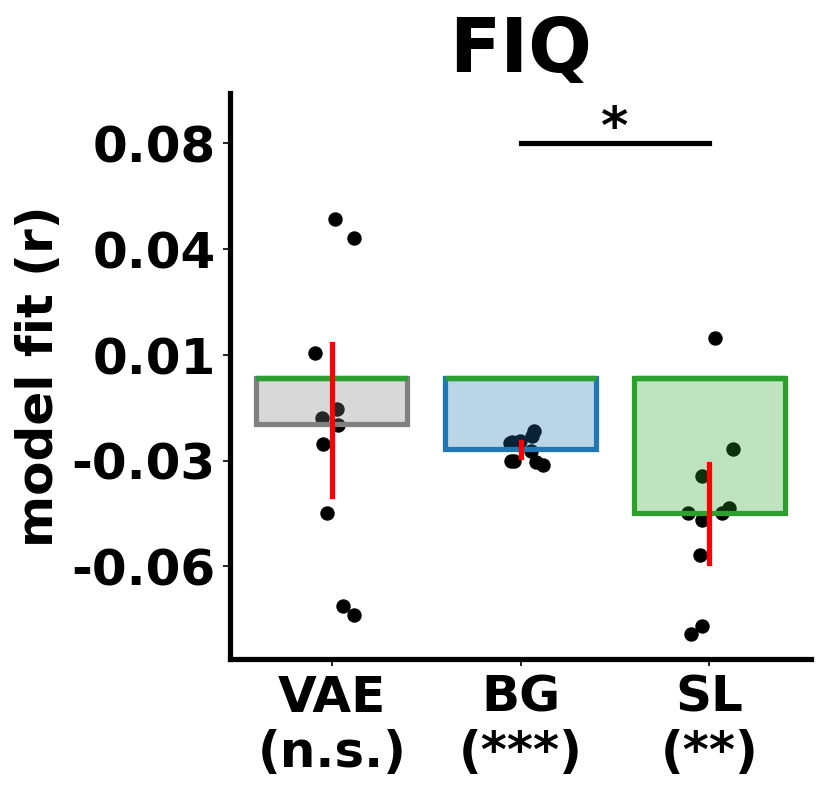

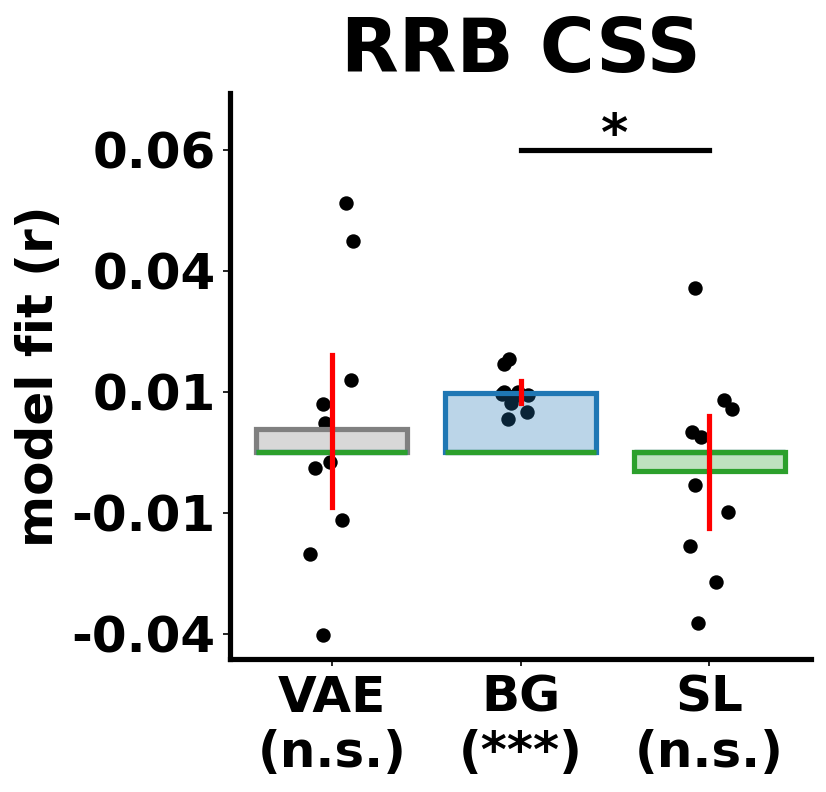

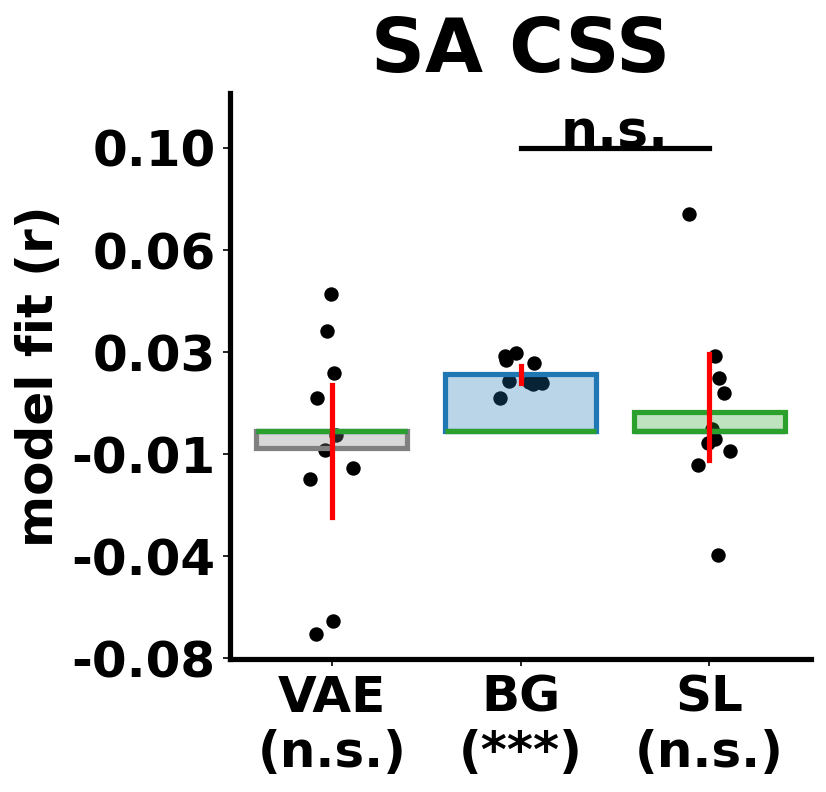

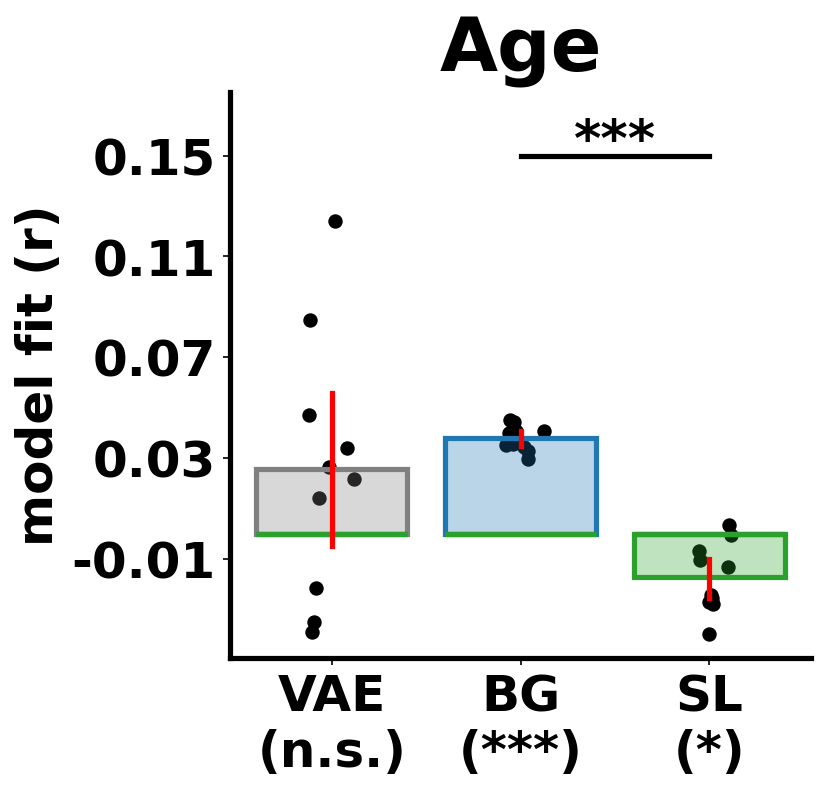

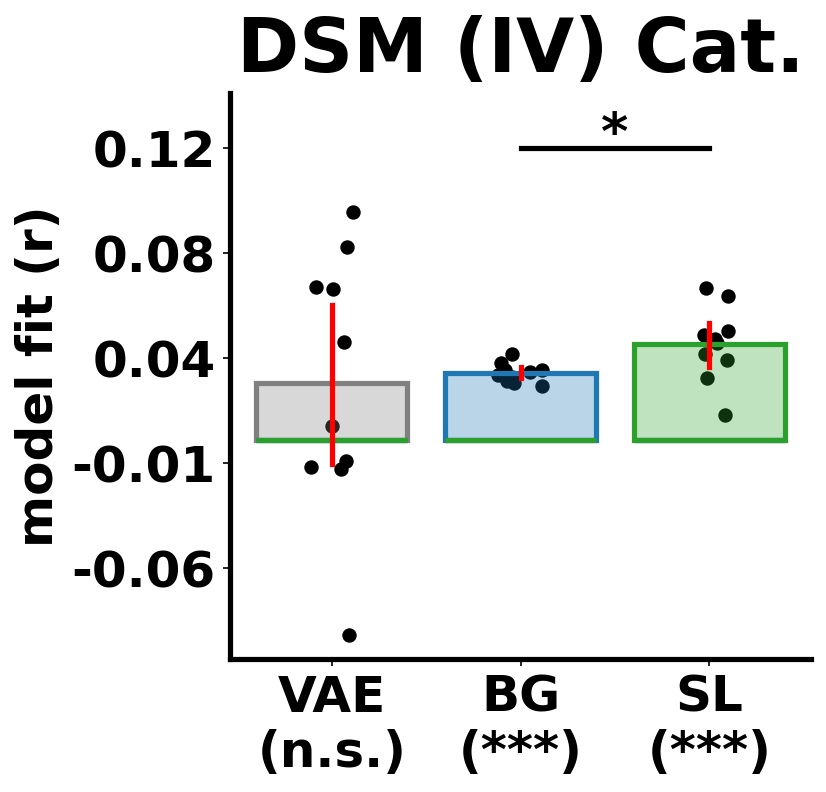

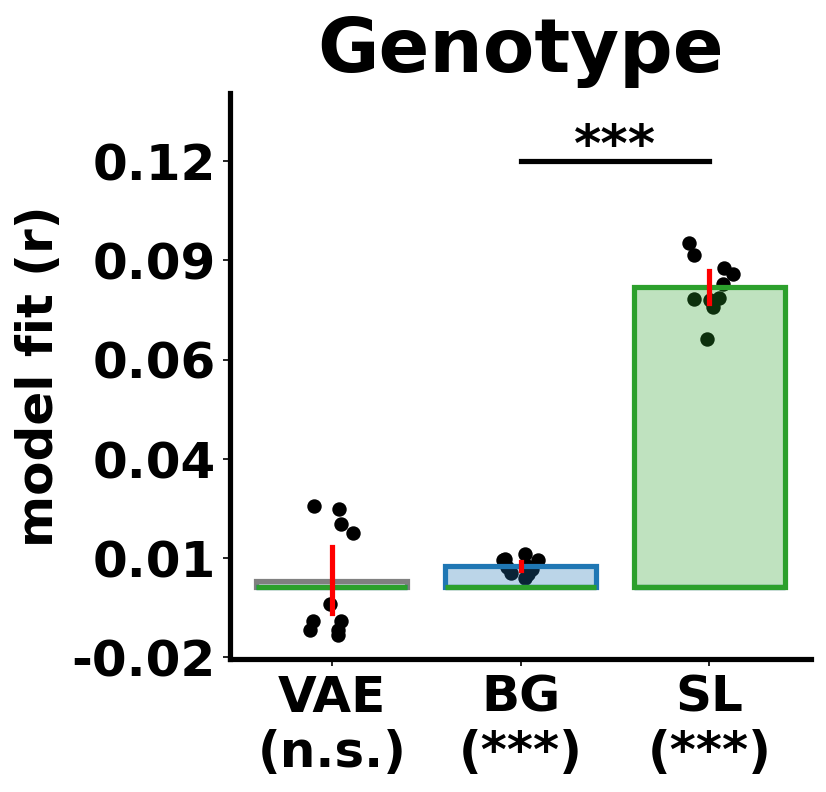

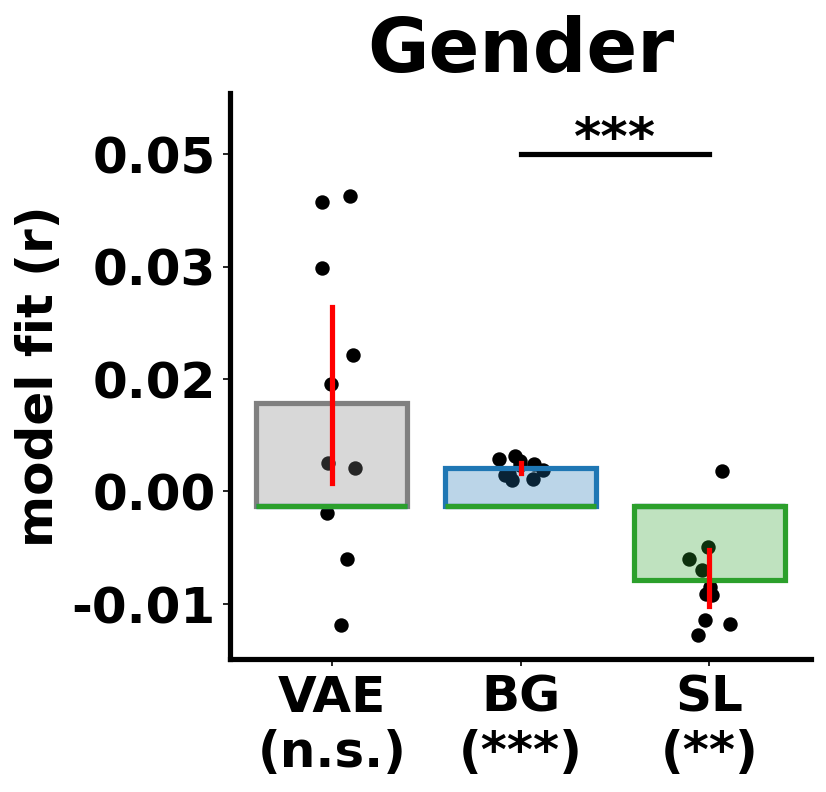

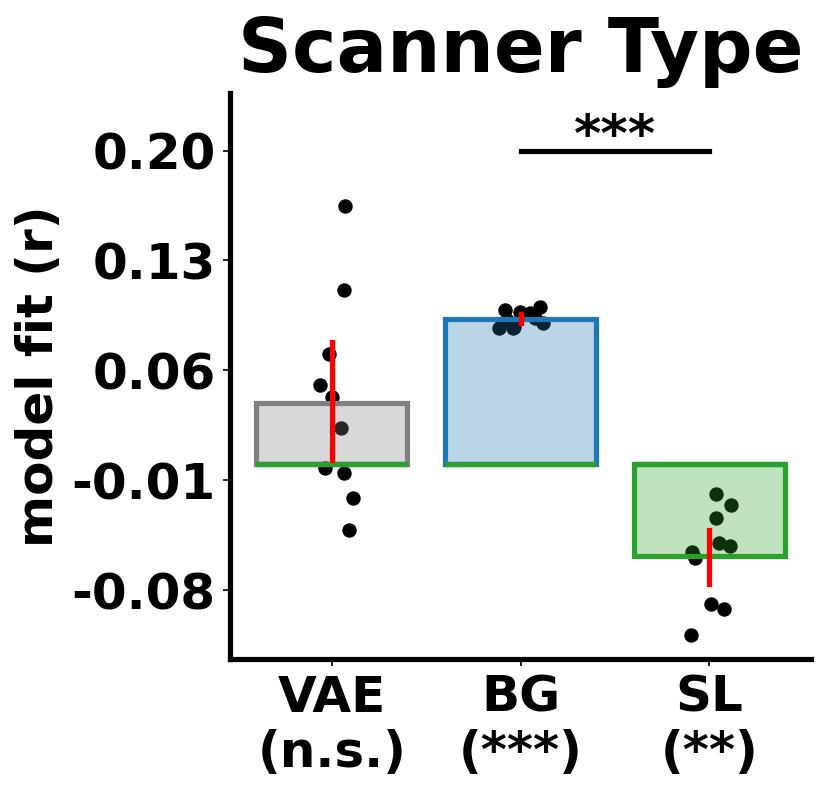

In [18]:
#plt.figure(figsize=(25,25))
for idx,key in enumerate(keys):
    #ax = plt.subplot(5,5,idx+1)
#    plot_nice_bar(key,rsa,ax=None)
    plot_nice_bar(key,rsa,ax=None,figsize=(5,5),dpi=150,fontsize=24,fontsize_star=25,fontweight='bold',line_width=2.5,marker_size=35,title=nice_titles[idx])
    plt.savefig(f'/mmfs1/data/aglinska/BC-MRI-AE/Results/figures/barplots/bar_{key}.pdf',bbox_inches='tight')

In [15]:
keys

['ADOS_Total',
 'ADOS_Social',
 'DSMIVTR',
 'AgeAtScan',
 'Sex',
 'ScannerID',
 'ScanSiteID',
 'FIQ',
 'FIQ_TD',
 'ADOS_PC1',
 'ADI_PC1',
 'ADOS_gotham_PC1',
 'Vineland_PC1',
 'WISC_PC1',
 'pca_vineland_td',
 'pca_vineland_asd',
 'sfari_age_months',
 'sfari_best_full_scale_iq',
 'sfari_rrb_css',
 'sfari_sa_css',
 'sfari_age_years',
 'sfari_ord_diagnosis',
 'sfari_ord_gene',
 'sfari_ord_sex',
 'sfari_ord_scanner']

In [19]:
abide_keys = ['ADOS_Total',
 'ADOS_Social',
 'DSMIVTR',
 'AgeAtScan',
 'Sex',
 'ScannerID',
 'ScanSiteID',
 'FIQ',
 'ADOS_PC1',
 'ADI_PC1',
 'ADOS_gotham_PC1',
 'WISC_PC1',
 'pca_vineland_asd']
#n = len(these_keys)

In [20]:
sfari_keys = [ 'sfari_age_months',
 'sfari_best_full_scale_iq',
 'sfari_rrb_css',
 'sfari_sa_css',
 'sfari_ord_diagnosis',
 'sfari_ord_gene',
 'sfari_ord_sex',
 'sfari_ord_scanner']
#n = len(these_keys)

In [21]:
nice_titles = ['ADOS Total',
'ADOS Social',
'DSM (IV) Cat.',
'Age',
'Gender',
'Scanner Type',
'Scanning Site',
'FIQ',
'FIQ TD',
'ADOS (PCA)',
'ADI (PCA)',
'ADOS Gotham (PCA)',
'Vineland (PCA)',
'WISC (PCA)',
'Vineland (PCA) (TD)',
'Vineland (PCA) (ASD)',
'Age',
'FIQ',
'RRB CSS',
'SA CSS',
'Age',
'DSM (IV) Cat.',
'Genotype',
'Gender',
'Scanner Type']

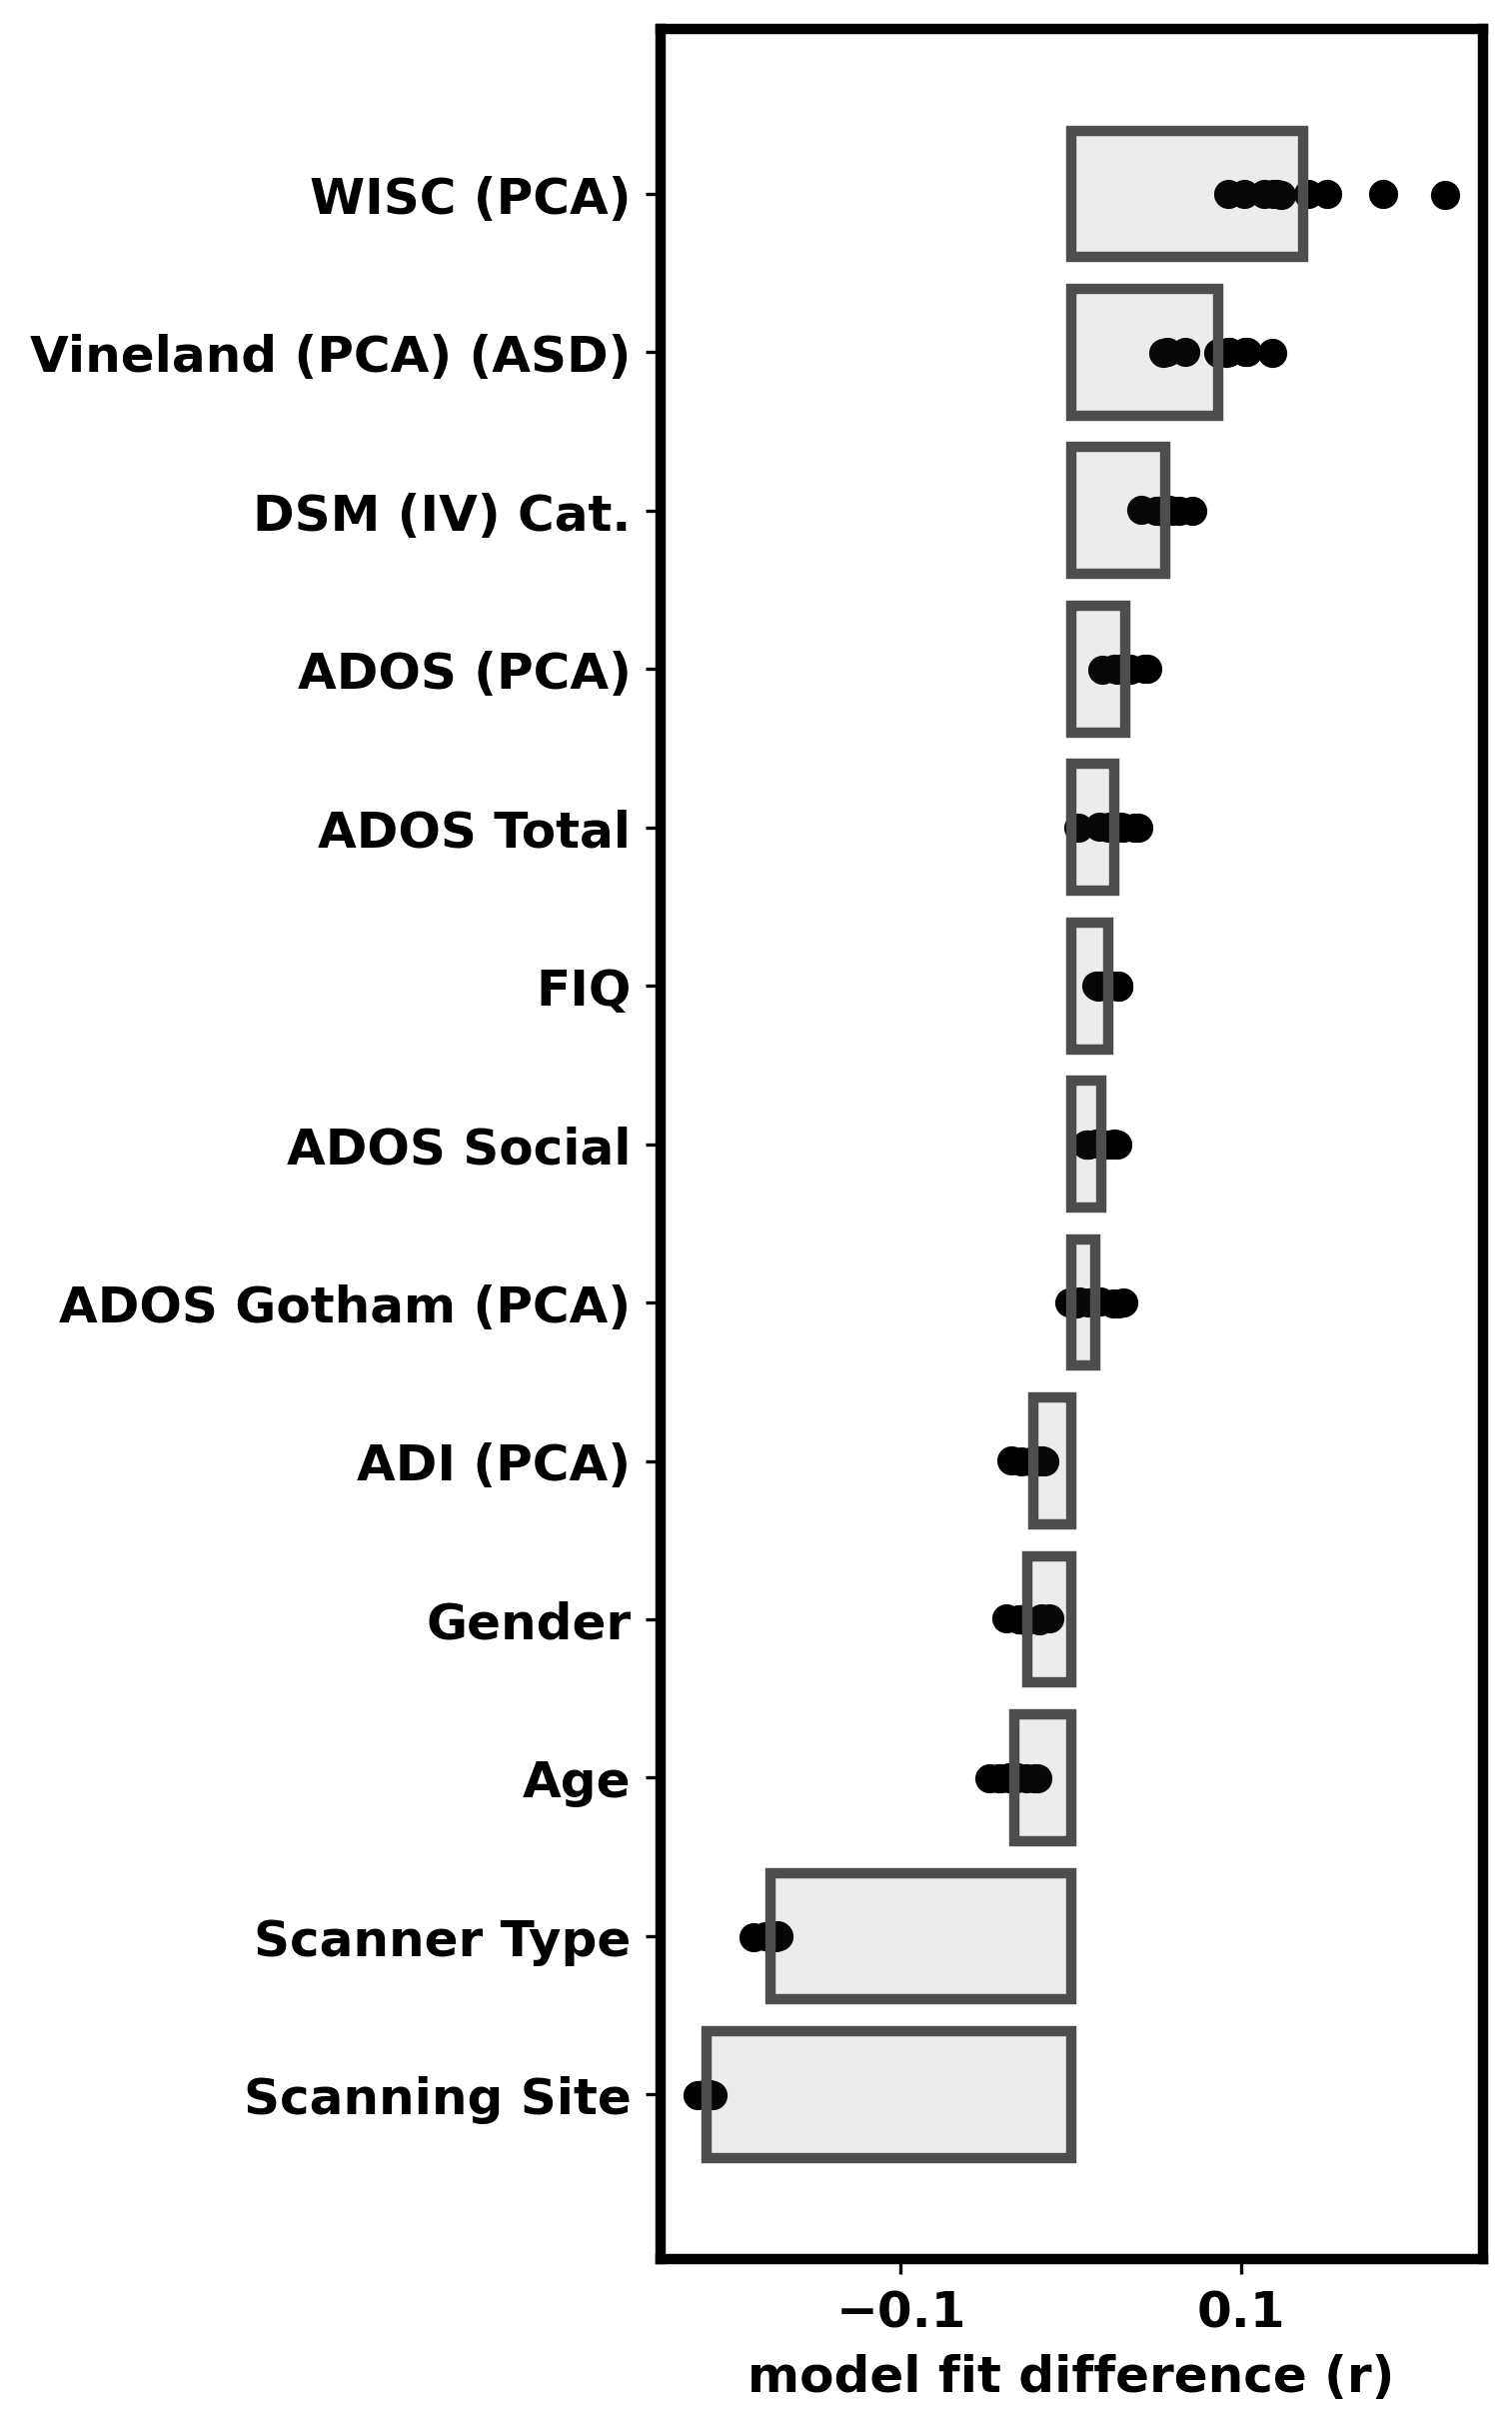

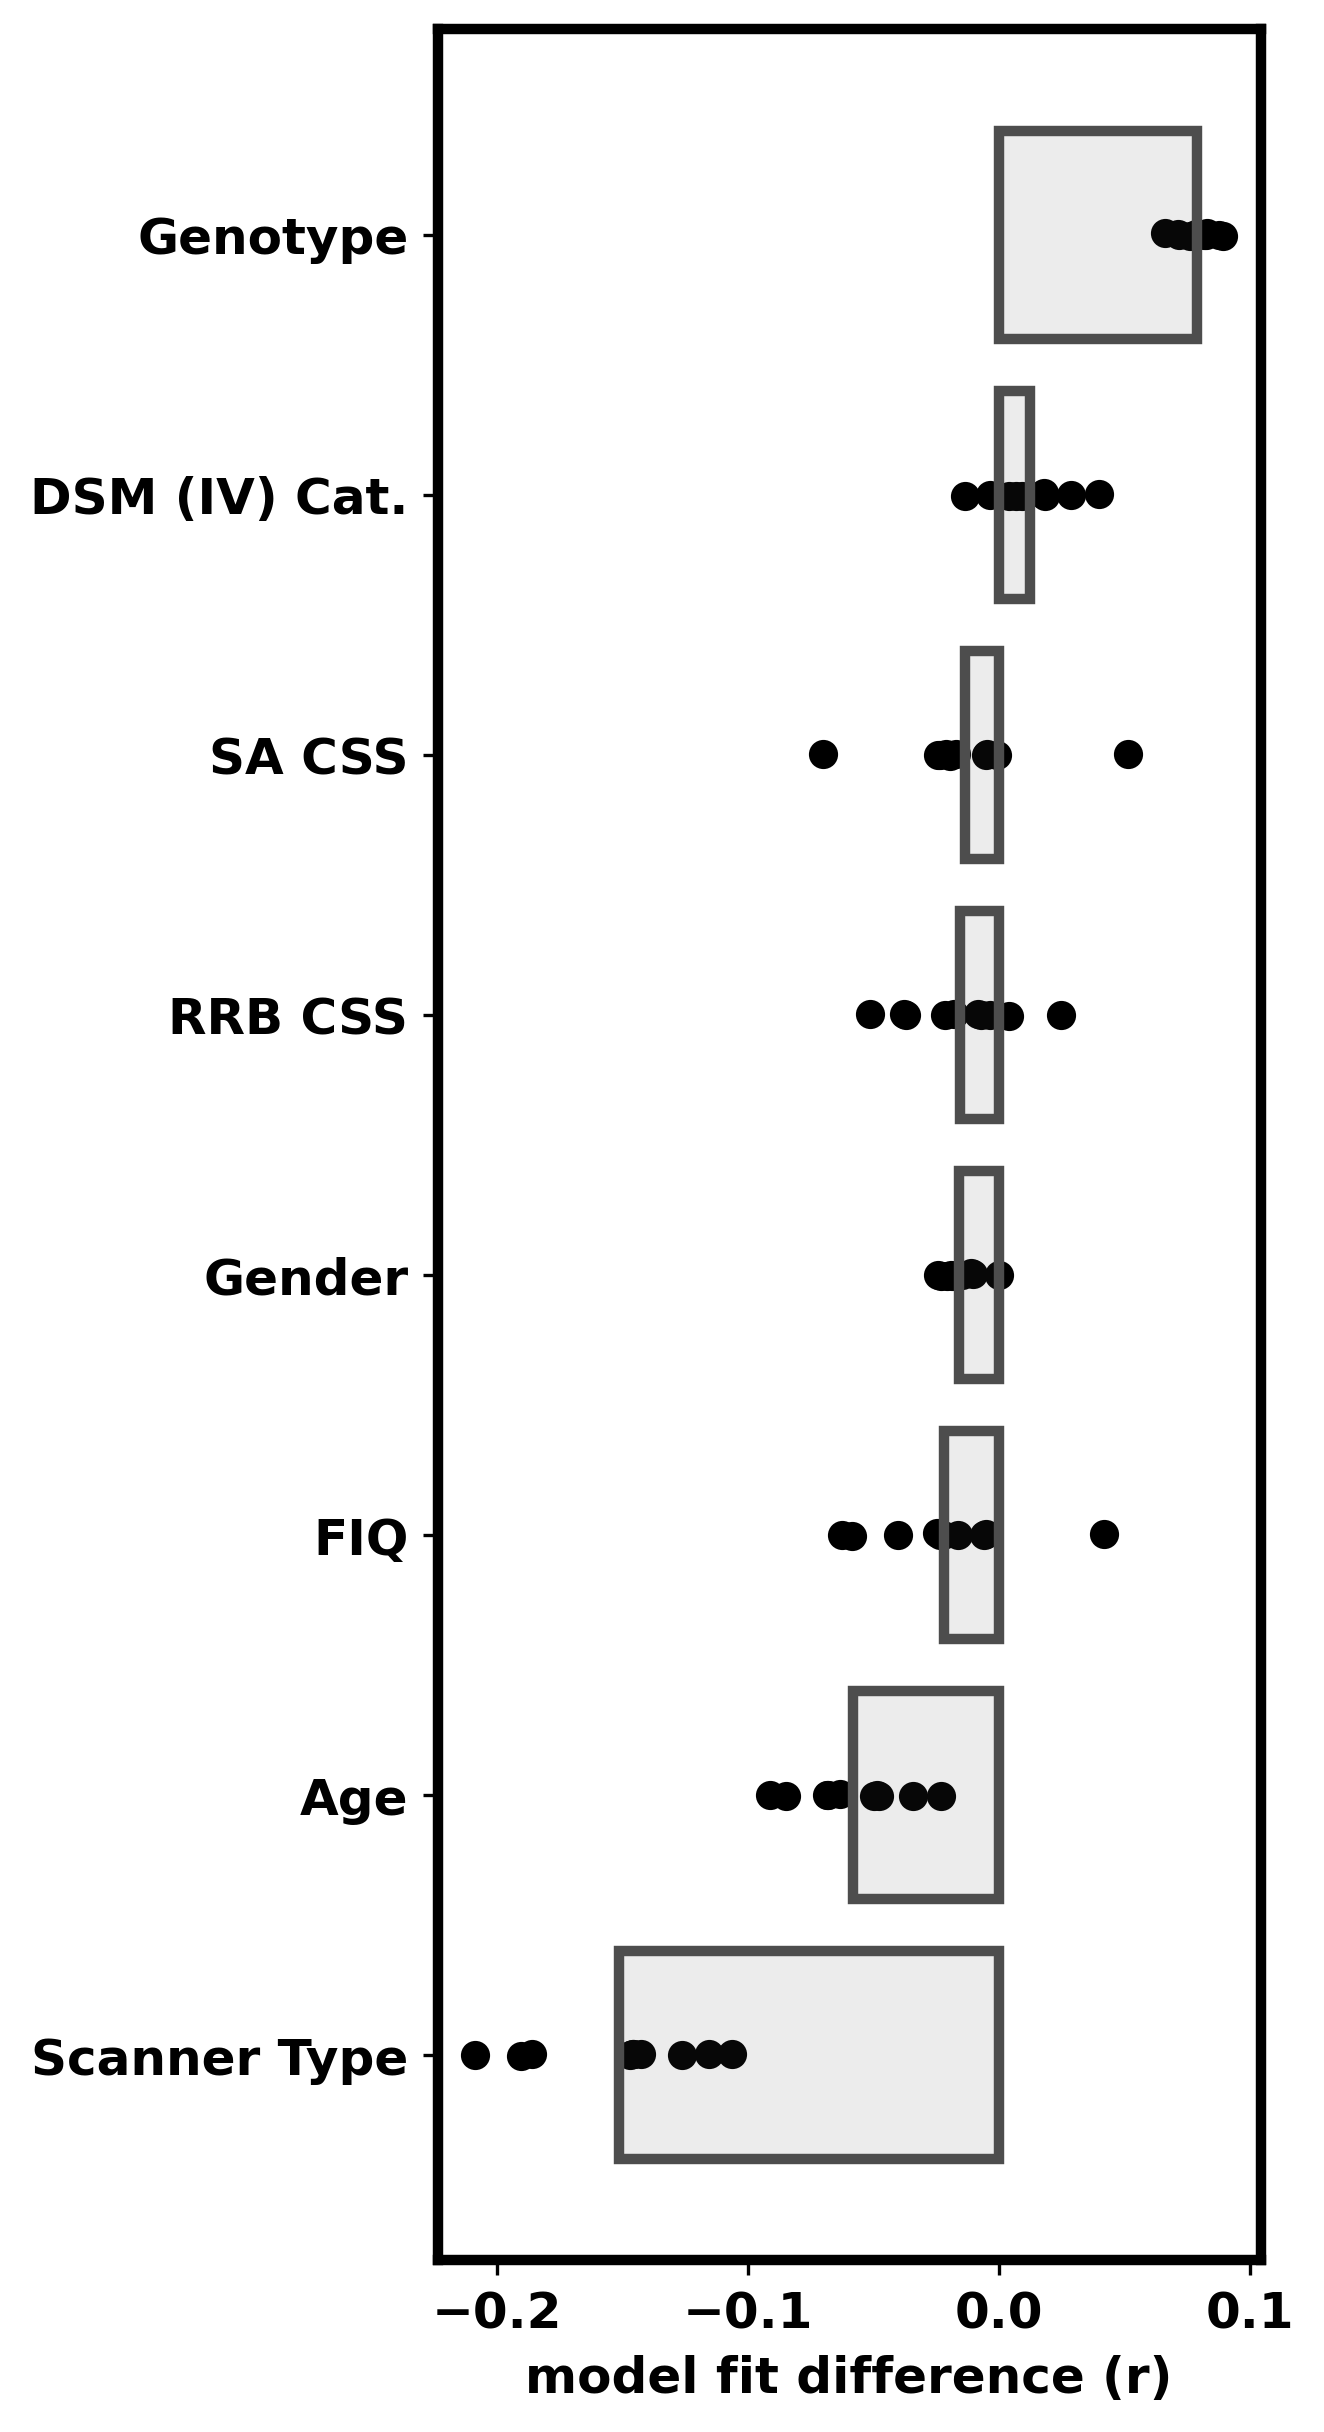

In [34]:
figsize=(5,2)
dpi=300
fontsize=12
fontsize_star=25
fontweight='bold'
line_width=2.5
marker_size=35


cc = -1
for idx,these_keys in enumerate([abide_keys,sfari_keys]):
    n = len(these_keys)
    cc+=1

    sz = 5
    fig,ax = plt.subplots(1,1,figsize=(sz*1.18*.6,sz*1.97),dpi=dpi)
    xs = np.arange(n);
    
    arr = np.array([rsa[key] for key in these_keys])
    #print(arr.shape)
    diff = arr[:,:,2]-arr[:,:,1]
    idx = np.argsort(diff.mean(axis=1))
    #lbls = np.array(these_keys)[idx]
    lbls = [nice_titles[np.argwhere(np.array(this_key)==np.array(keys))[0][0]] for this_key in these_keys]
    lbls = np.array(lbls)[idx]
    
    cmax = max([len(i) for i in lbls])
    #lbls = [lbl.ljust(cmax) for lbl in lbls]
    
    diff = diff[idx,:]
    vals = diff.mean(axis=1);
    

    pvec = diff.mean(axis=1)
    pvec = (pvec-pvec.min()) / (pvec.max()-pvec.min())
    for i in range(n):
        p = pvec[i]**3
        #c = pallete_new[1]*(1-p)+pallete_new[2]*p
        c = np.array((0,0,.5))*(1-p)+np.array((0,.5,0))*p
        plt.barh(xs[i],vals[i],edgecolor=[.3,.3,.3,1],facecolor=[.3,.3,.3,.1],linewidth=line_width);
        #plt.barh(xs[i],vals[i],edgecolor=np.hstack((c,1)),facecolor=np.hstack((c,.3)),linewidth=2);

    plt.yticks(xs,labels=lbls,fontsize=fontsize,fontweight=fontweight,multialignment='right');
    xticks = plt.xticks()
    xticks = xticks[0]
    xticks = xticks[0::2]
    plt.xticks(xticks,fontsize=fontsize,fontweight=fontweight)

    for i in range(n):
        xs = np.repeat(i,10)+(np.random.rand(10)-.5)*.01
        plt.scatter(diff[i,:],xs,c='k')
    figttl = ['abide','sfari'][cc]
    
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(line_width)
            
    plt.xlabel('model fit difference (r)',fontsize=fontsize,fontweight=fontweight)
            
    plt.savefig(f'/mmfs1/data/aglinska/BC-MRI-AE/Results/figures/diverging_bars{figttl}.pdf',bbox_inches='tight')

In [211]:
[]

['Scanner Type ',
 'Age          ',
 'FIQ          ',
 'Gender       ',
 'RRB CSS      ',
 'SA CSS       ',
 'DSM (IV) Cat.',
 'Genotype     ']

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

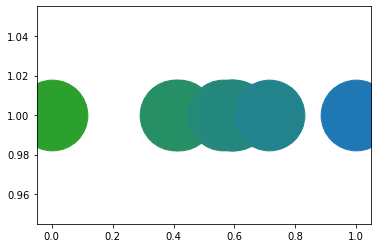

In [57]:
for p in pvec:
#p = .7
    pallete_new = np.array(pallete_new)
    c = pallete_new[1]*p+pallete_new[2]*(1-p)

    plt.scatter(p,1,c=c,s=5000)
    #plt.scatter(2,1,c=c,s=5000)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])